In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

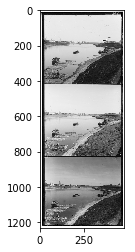

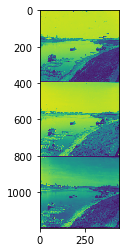

<Figure size 432x288 with 0 Axes>

In [60]:
# Read RGB type of image and save image in set directory  
# 1
img = cv2.imread("C:\\Users\\....")
 
def Get_image (img, a , b , c , d) : 
    plt.imshow(img)
    plt.figure()

    # Convert BGR image to Gray scale image 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Crop the images for ignore the image borders
    height, width = gray.shape
    gray = gray[int(height*a) : int(height - height*b), int(width*c) : int(width - width*d) ]

    # Find each_hght value for divide the image into three equal parts
    height, width = gray.shape
    each_hght = int(height/3)

    plt.imshow(gray)
    plt.figure()
    return each_hght,gray
    
each_hght,gray = Get_image (img,0.02,0.0095,0.05,0.04)

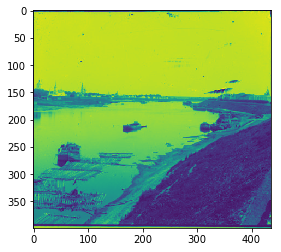

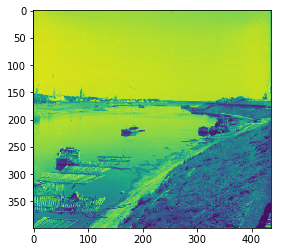

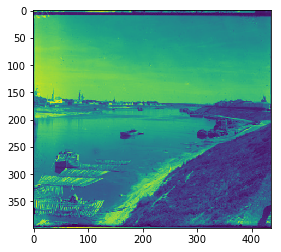

In [62]:
# set divided image height total height / 3 
def Split_image (each_hght,gray) : 
    B = gray[0:each_hght,:]
    G = gray[each_hght:2*each_hght,:]
    R = gray[2*each_hght:3*each_hght,:]

    plt.imshow(B)
    plt.figure()
    plt.imshow(G)
    plt.figure()
    plt.imshow(R)
    
    return B,G,R

B,G,R = Split_image (each_hght,gray)

In [33]:
def Align(image1, image2):
    #t = 15
    # Search 20 pixels from directions (the best one)
    search = 20
    
    # For both of the images extract mean to get new matrises / image1 and image2
    image1 = image1-image1.mean(axis=0)
    
    # Initial value for compare operation (value_compare and ncc) 
    value_compare = -1
    
    # Searching (-20, 20) for 40 samples to generate 
    search_x=np.linspace(-search,search,2*search,dtype=int)
    search_y=np.linspace(-search,search,2*search,dtype=int)
    
    # Search according to image2 and calculate ncc value    
    for x in search_x:
        for y in search_y:
            
            #For(G or R) calculate multiroll for two dimentional roll ycolumn xrow with changing x y values
            image2_roll = np.roll(image2,[x,y],axis=(0,1))
            image2_roll = image2_roll - image2_roll.mean(axis=0)
            
            # Divide both norms to image matries and calculate NCC according to = (A) * (B) formule
            ncc = (image1 / np.linalg.norm(image1)) * (image2_roll/np.linalg.norm(image2_roll))
            ncc = np.sum(ncc)            
            if ncc > value_compare:
                value_compare = ncc
                
                # Best search index
                index = [x,y]
                
    print (value_compare)
    
    return index

In [63]:
print ("value_compare : ")
G_B = Align(B,G)
print ("(x,y) : ")
print (G_B)

G = np.roll( G , [G_B[0] , G_B[1]] , axis=(0,1) )

value_compare : 
0.8919773021444611
(x,y) : 
[-7, 2]


In [66]:
print ("value_compare : ")
R_B = Align(B,R)
print ("(x,y) : ")
print (R_B)

R = np.roll( R , [R_B[0] , R_B[1]] , axis=(0,1) )

value_compare : 
0.7718158553164362
(x,y) : 
[-12, 4]


In [67]:
reshaped = np.dstack((R,G,B))
colorImg_aligned = ( reshaped ).astype(np.uint8)

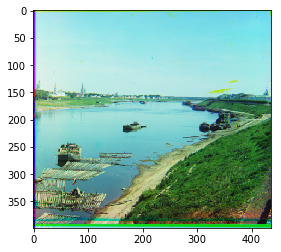

In [68]:
cv2.imwrite("C:\\Users\\....", colorImg_aligned)

plt.figure()
plt.imshow(colorImg_aligned)